### **Imports and Setup**

In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

current_dir = os.getcwd()

db_path = os.path.abspath(os.path.join(current_dir, '..', 'data', 'app.db'))

print(f"Looking for database at: {db_path}")

if not os.path.exists(db_path):
    db_path = os.path.join(current_dir, 'data', 'app.db')
    print(f"Not found. Trying root path: {db_path}")

if not os.path.exists(db_path):
    print("ERROR: File still not found! Check your folder structure.")
else:
    try:
        conn = sqlite3.connect(db_path)
        print("Success! Database connected.")
    except Exception as e:
        print(f"Connection Error: {e}")

Looking for database at: /Users/kemelmerey/Desktop/Data collection and preparation/final/DCP_final_project/data/app.db
Success! Database connected.


### **Inspect Raw Event Data**

In [47]:
query_events = "SELECT * FROM events ORDER BY id DESC LIMIT 10"
df_events = pd.read_sql_query(query_events, conn)

print("Last 10 Recorded Events (Cleaned Data)")
display(df_events)

Last 10 Recorded Events (Cleaned Data)


,id,ingestion_timestamp,forecast_intensity,actual_intensity,index_intensity,source,created_at
0,80,2025-12-17T17:22:15.201889,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
1,79,2025-12-17T17:21:44.200970,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
2,78,2025-12-17T17:21:13.305457,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
3,77,2025-12-17T17:20:42.363494,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
4,76,2025-12-17T17:20:11.319593,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
5,75,2025-12-17T17:19:40.363466,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
6,74,2025-12-17T17:19:09.158542,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
7,73,2025-12-17T17:18:38.321542,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
8,72,2025-12-17T17:18:07.356356,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21
9,71,2025-12-17T17:17:36.220188,136,131,moderate,carbonintensity.org.uk,2025-12-17 17:22:21


### **Inspect Daily Summary Analytics**

In [48]:
query_summary = "SELECT * FROM daily_summary ORDER BY summary_date DESC, part_of_day"
df_summary = pd.read_sql_query(query_summary, conn)

print("Daily Analytics Summary")
display(df_summary)

Daily Analytics Summary


,summary_date,part_of_day,avg_forecast,avg_actual,max_intensity,min_intensity
0,2025-12-17,Afternoon,139.0,134.7,135,134
1,2025-12-17,Afternoon,139.0,134.9,135,134


### **Visualization (Forecast vs Actual)**

## Carbon Intensity History

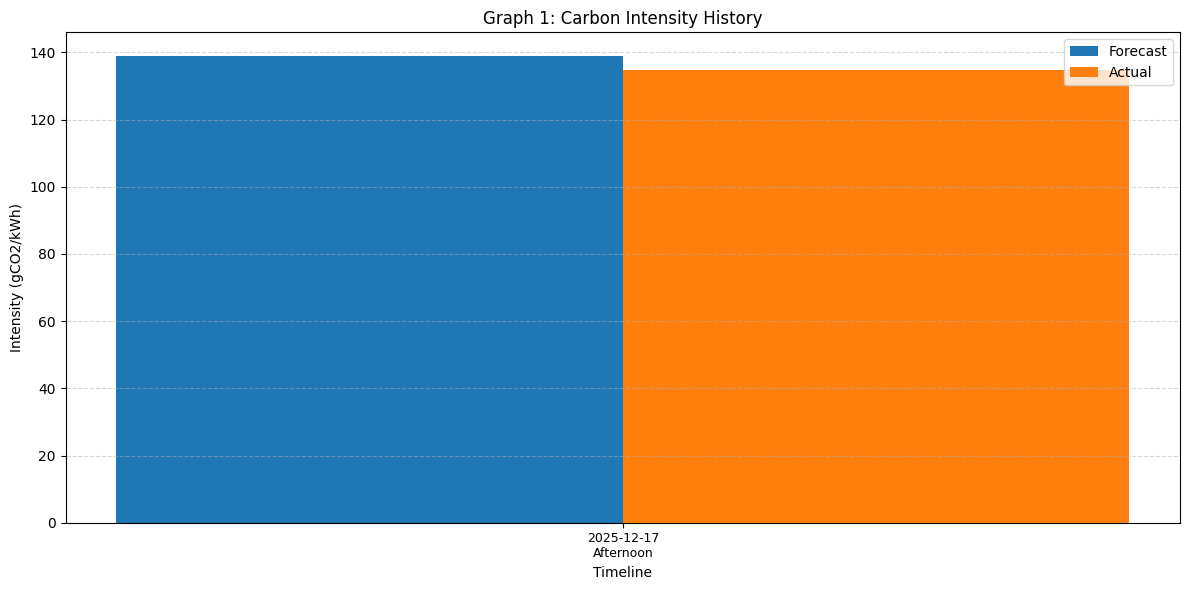

In [53]:
if not df_summary.empty:
    day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
    
    df_clean = df_summary.groupby(['summary_date', 'part_of_day'])[['avg_forecast', 'avg_actual']].mean().reset_index()
    
    df_clean['part_of_day'] = pd.Categorical(df_clean['part_of_day'], categories=day_order, ordered=True)
    df_timeline = df_clean.sort_values(['summary_date', 'part_of_day'])
    
    df_timeline['label'] = df_timeline['summary_date'].astype(str) + '\n' + df_timeline['part_of_day'].astype(str)
    
    plt.figure(figsize=(12, 6))
    
    x_labels = df_timeline['label']
    x_axis = range(len(x_labels))
    
    plt.bar([x - 0.2 for x in x_axis], df_timeline['avg_forecast'], width=0.4, label='Forecast', color='#1f77b4')
    plt.bar([x + 0.2 for x in x_axis], df_timeline['avg_actual'], width=0.4, label='Actual', color='#ff7f0e')
    
    plt.xlabel('Timeline')
    plt.ylabel('Intensity (gCO2/kWh)')
    plt.title("Graph 1: Carbon Intensity History")
    plt.xticks(x_axis, x_labels, rotation=0, fontsize=9)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

else:
    print("No summary data available yet.")

## General Trends

/var/folders/j4/23xllpp92m17jlldptft9w840000gn/T/ipykernel_98165/2866309616.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_trends = df_clean.groupby('part_of_day')[['avg_forecast', 'avg_actual']].mean().reset_index()


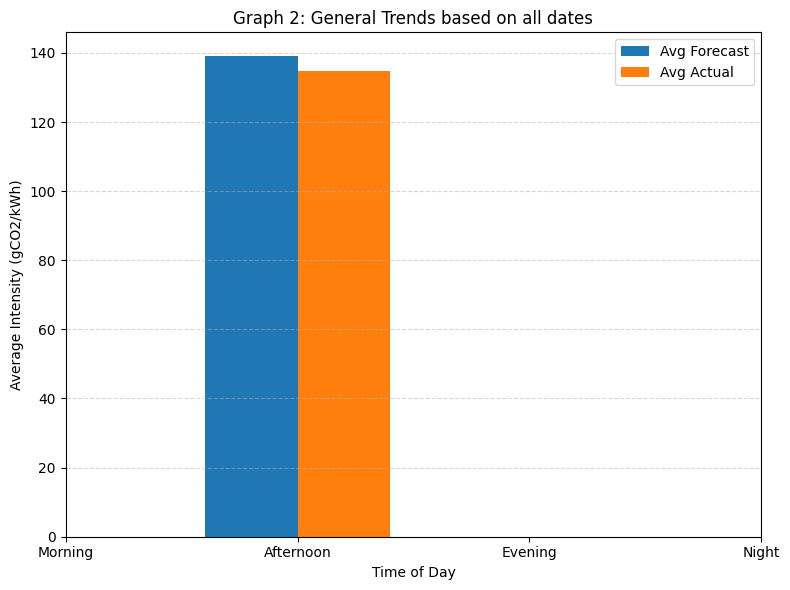

In [54]:
if not df_summary.empty:
    day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
    df_clean = df_summary.groupby(['summary_date', 'part_of_day'])[['avg_forecast', 'avg_actual']].mean().reset_index()
    df_clean['part_of_day'] = pd.Categorical(df_clean['part_of_day'], categories=day_order, ordered=True)
    
    df_trends = df_clean.groupby('part_of_day')[['avg_forecast', 'avg_actual']].mean().reset_index()
    
    plt.figure(figsize=(8, 6))
    
    x_labels = df_trends['part_of_day']
    x_axis = range(len(x_labels))
    
    plt.bar([x - 0.2 for x in x_axis], df_trends['avg_forecast'], width=0.4, label='Avg Forecast', color='#1f77b4')
    plt.bar([x + 0.2 for x in x_axis], df_trends['avg_actual'], width=0.4, label='Avg Actual', color='#ff7f0e')
    
    plt.xlabel('Time of Day')
    plt.ylabel('Average Intensity (gCO2/kWh)')
    plt.title("Graph 2: General Trends based on all dates")
    plt.xticks(x_axis, x_labels)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

else:
    print(" No summary data available yet.")

### **Close Connection**

In [51]:
conn.close()
print("Database connection closed.")

Database connection closed.
